# Deanna's Exploration of the Data

In [1]:
import pandas as pd
import numpy as np
import sqlite3
from scipy import stats 
import math

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
plt.style.use('seaborn-colorblind')
plt.rc('axes',titlesize = 24)
plt.rc('axes',labelsize = 24)

In [3]:
movieGross = pd.read_csv('cleanedData/movieGrossClean.csv', index_col = 0)
tmdbMovies = pd.read_csv('cleanedData/tmdbMoviesClean.csv', index_col = 0)
movieBudgets = pd.read_csv('cleanedData/movieBudgets.csv',index_col = 0)
movieInfo = pd.read_csv('cleanedData/movieInfoClean.csv', index_col = 0)
reviews = pd.read_csv('cleanedData/reviewsClean.csv', index_col=0)
# Connect to sql database
conn = sqlite3.connect('data/im.db')

### Taking Preliminary Look at the Data

In [28]:
movieGross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000,652000000,2010-01-01
1,Alice in Wonderland (2010),BV,334200000,691300000,2010-01-01
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010-01-01
3,Inception,WB,292600000,535700000,2010-01-01
4,Shrek Forever After,P/DW,238700000,513900000,2010-01-01


In [54]:
movieGross['title'].value_counts()

Bluebeard                              2
Toy Story 3                            1
Shame                                  1
Paper Towns                            1
Violeta Went to Heaven                 1
                                      ..
I Melt With You                        1
Ondine                                 1
Teenage Mutant Ninja Turtles (2014)    1
Hanna                                  1
Wadjda (U.S. only)                     1
Name: title, Length: 3386, dtype: int64

In [29]:
tmdbMovies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"['Adventure', 'Fantasy', 'Family']",...,0,0,0,0,0,0,0,0,0,0
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"['Fantasy', 'Adventure', 'Animation', 'Family']",...,0,0,0,0,0,0,0,0,0,0
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"['Adventure', 'Action', 'Science Fiction']",...,0,0,0,0,0,1,0,0,0,0
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"['Animation', 'Comedy', 'Family']",...,0,0,0,0,0,0,0,0,0,0
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"['Action', 'Science Fiction', 'Adventure']",...,0,0,0,0,0,1,0,0,0,0


In [53]:
tmdbMovies['id'].value_counts()

292086    3
463839    3
11976     3
391872    3
416572    3
         ..
356987    1
350846    1
479871    1
500353    1
524288    1
Name: id, Length: 25497, dtype: int64

In [31]:
movieBudgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [32]:
movieBudgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 316.2+ KB


In [33]:
movieInfo.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,"['Action', 'Adventure', 'Classics', 'Drama']",William Friedkin,Ernest Tidyman,1971-10-09 00:00:00,2001-09-25 00:00:00,-,0.0,104,-
3,"New York City, not-too-distant-future: Eric Pa...",R,"['Drama', 'Science Fiction', 'Fantasy']",David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17 00:00:00,2013-01-01 00:00:00,$,600000.0,108,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,"['Drama', 'Music']",Allison Anders,Allison Anders,1996-09-13 00:00:00,2000-04-18 00:00:00,-,0.0,116,-
6,Michael Douglas runs afoul of a treacherous su...,R,"['Drama', 'Mystery']",Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09 00:00:00,1997-08-27 00:00:00,-,0.0,128,-
7,-,NR,"['Drama', 'Romance']",Rodney Bennett,Giles Cooper,-,-,-,0.0,200,-


In [34]:
movieInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   synopsis      1556 non-null   object 
 1   rating        1556 non-null   object 
 2   genre         1556 non-null   object 
 3   director      1556 non-null   object 
 4   writer        1556 non-null   object 
 5   theater_date  1556 non-null   object 
 6   dvd_date      1556 non-null   object 
 7   currency      1556 non-null   object 
 8   box_office    1556 non-null   float64
 9   runtime       1556 non-null   int64  
 10  studio        1556 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 145.9+ KB


In [12]:
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,-,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,-,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,-,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,-,fresh,-,0,Cinema Scope,"October 12, 2017"


In [49]:
reviews['id'].value_counts()

782     338
1067    275
1525    262
1777    260
1083    260
       ... 
28        1
102       1
348       1
476       1
1727      1
Name: id, Length: 1135, dtype: int64

### Finding Top 50 Profitable Movies in MovieInfo

In [4]:
# Convert genre_ids into list
#library with function for us to complete this operation
import ast
#converts all strings into a list
movieInfo.genre = movieInfo.genre.map(lambda x: ast.literal_eval(x))

In [5]:
# copy dataframe for safety and ease
mi = movieInfo.copy()

In [6]:
# make sub dataframe uf the top 50 movies
top_mi = mi.sort_values(by=['box_office'],ascending=False)[0:50]
top_mi

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1071,This depiction of the last 12 hours in the lif...,R,[Drama],Mel Gibson,Mel Gibson|Benedict Fitzgerald,2004-02-25 00:00:00,2004-08-31 00:00:00,$,368000000.0,127,Newmarket Film Group
1136,The Hobbit: An Unexpected Journey follows titl...,PG-13,"[Action, Adventure, Science Fiction, Fantasy]",Peter Jackson,Peter Jackson|Philippa Boyens|Guillermo del To...,2012-12-14 00:00:00,2013-03-19 00:00:00,$,303001229.0,170,Warner Bros.
1525,"In Skyfall, Bond's loyalty to M is tested as h...",PG-13,"[Action, Adventure, Mystery]",Sam Mendes,John Logan|Robert Wade|Neal Purvis,2012-11-09 00:00:00,2013-03-11 00:00:00,$,299300000.0,145,MGM
883,"Now that Greg Focker is ""in"" with his soon-to-...",PG-13,[Comedy],Jay Roach,Jim Herzfeld|John Hamburg,2004-12-22 00:00:00,2005-04-26 00:00:00,$,279167575.0,118,Universal Pictures
1442,Youthful wizard Harry Potter returns to the sc...,PG,"[Family, Science Fiction, Fantasy]",Chris Columbus,Steve Kloves,2002-11-15 00:00:00,2003-04-11 00:00:00,$,261835892.0,161,Warner Bros. Pictures
1255,Mission: Impossible III director and Alias cre...,PG-13,"[Action, Adventure, Drama, Science Fiction, Fa...",-,Gene Roddenberry|Alex Kurtzman|Roberto Orci,2009-05-07 00:00:00,2009-11-17 00:00:00,$,257704099.0,127,IMAX
661,One woman's rocky road to the altar gets playe...,PG,"[Comedy, Romance]",Joel Zwick,Nia Vardalos,2002-04-19 00:00:00,2003-02-11 00:00:00,$,241250669.0,95,IFC Films
841,This is a contemporary retelling of H.G. Wells...,PG-13,"[Action, Adventure, Science Fiction, Fantasy]",Steven Spielberg,Josh Friedman|David Koepp,2005-06-29 00:00:00,2005-11-22 00:00:00,$,234141872.0,117,Paramount Pictures
1877,A hard-drinking lush finds himself thrust into...,PG-13,"[Action, Adventure, Comedy, Drama]",Peter Berg,Vincent Gilligan|Vince Gilligan|Vy Vincent Ngo,2008-06-16 00:00:00,2008-11-25 00:00:00,$,227946274.0,92,Columbia Pictures


Identifying top genres

In [7]:
# make list of top genres
top_genres=[]
for genres in top_mi['genre']:
    top_genres += genres
genre_freq = {}
for g in top_genres:
    if g not in genre_freq.keys():
        genre_freq[g] = 1
    else:
        genre_freq[g] += 1
genre_freq

{'Drama': 20,
 'Action': 19,
 'Adventure': 19,
 'Science Fiction': 11,
 'Fantasy': 11,
 'Mystery': 12,
 'Comedy': 25,
 'Family': 7,
 'Romance': 11,
 'Horror': 1,
 'Animation': 6}

<AxesSubplot:title={'center':'Genres in Top 50 Movies'}, xlabel='Genres', ylabel='Number of Movies'>

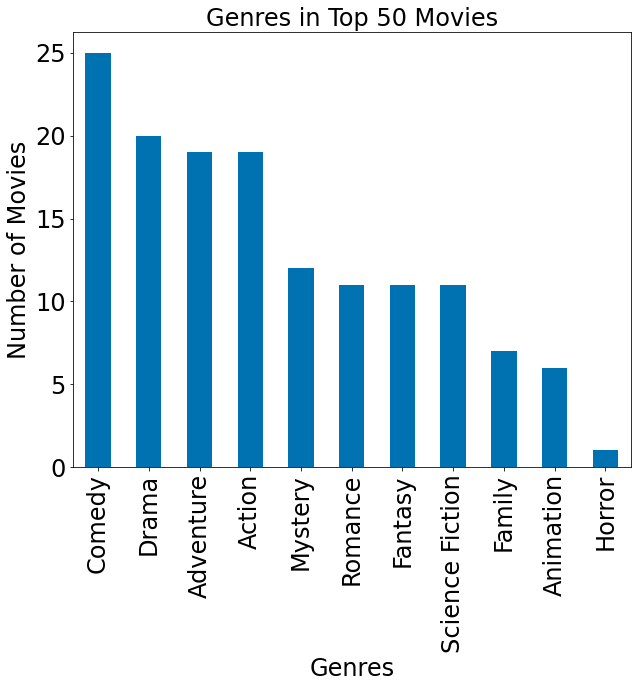

In [8]:
chart_genre = pd.Series(genre_freq)
chart_genre = chart_genre.sort_values(ascending = False)
chart_genre.plot(kind = 'bar', 
                 title = 'Genres in Top 50 Movies',
                 xlabel="Genres",
                 ylabel='Number of Movies',
                 fontsize=24)

Comparing top genres to genres of all movies

In [55]:
all_genres=[]
for genres in mi['genre']:
    if '-' not in genres:
        all_genres += genres
genre_freq_all = {}
for g in all_genres:
    if g not in genre_freq_all.keys():
        genre_freq_all[g] = 1
    else:
        genre_freq_all[g] += 1        
abb_genres = ['Act',
              'Adv',
              'Anim',
              'Anime',
              'Art',
              'Class',
              'Com',
              'Cult',
              'Doc',
              'Drama',
              'Faith',
              'Fam',
              'Fant',
              'LGBTQ+',
              'Hor',
              'Mus',
              'Myst',
              'Rom',
              'Sci-Fi',
              'Sp Int',
              'Sports',
              'TV',
              'West'
             ]
genre_keys = sorted(list(set(all_genres)))
genre_legend={}
for i in range(len(genre_keys)):
    genre_legend[genre_keys[i]]=abb_genres[i]
genre_legend

{'Action': 'Act',
 'Adventure': 'Adv',
 'Animation': 'Anim',
 'Anime and Manga': 'Anime',
 'Art House and International': 'Art',
 'Classics': 'Class',
 'Comedy': 'Com',
 'Cult Movies': 'Cult',
 'Documentary': 'Doc',
 'Drama': 'Drama',
 'Faith and Spirituality': 'Faith',
 'Family': 'Fam',
 'Fantasy': 'Fant',
 'Gay and Lesbian': 'LGBTQ+',
 'Horror': 'Hor',
 'Music': 'Mus',
 'Mystery': 'Myst',
 'Romance': 'Rom',
 'Science Fiction': 'Sci-Fi',
 'Special Interest': 'Sp Int',
 'Sports and Fitness': 'Sports',
 'TV Movie': 'TV',
 'Western': 'West'}

<AxesSubplot:title={'center':'Genres in All Movies'}, xlabel='Genres', ylabel='Number of Movies'>

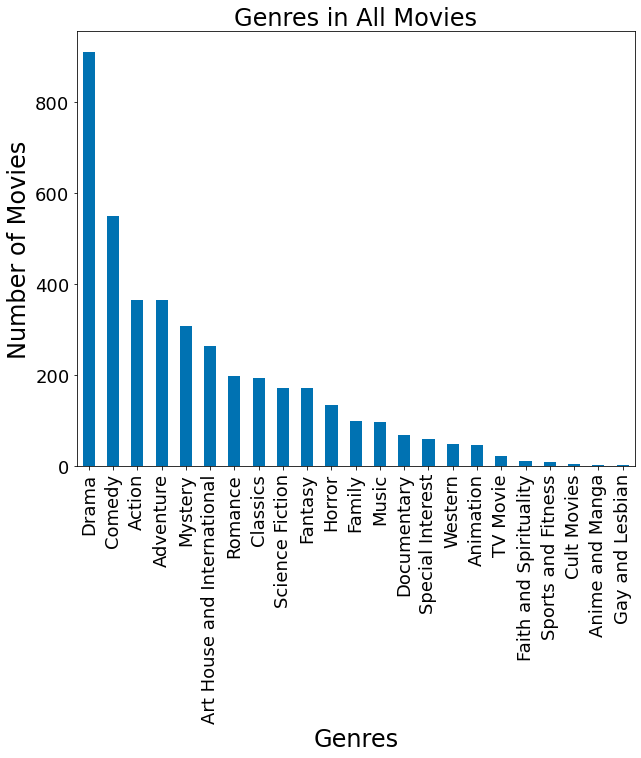

In [10]:
all_genre = pd.Series(genre_freq_all)
chart_genre_all = all_genre.sort_values(ascending = False)
chart_genre_all.plot(kind = 'bar', 
                     title = 'Genres in All Movies',
                     xlabel="Genres",
                     ylabel='Number of Movies',
                     fontsize=18)

Finding most common combos of genres

In [11]:
genre_combos = mi['genre']
genre_combos = genre_combos.map(lambda x: ', '.join([genre_legend[i]for i in x if i != '-']))
genre_combo_freq = {}
for g in genre_combos:
    if g not in genre_combo_freq.keys():
        genre_combo_freq[g] = 1
    else:
        genre_combo_freq[g] += 1
genre_combo_freq

{'Act, Adv, Class, Drama': 5,
 'Drama, Sci-Fi, Fant': 8,
 'Drama, Mus': 14,
 'Drama, Myst': 67,
 'Drama, Rom': 35,
 'Drama, Fam': 4,
 'Com': 110,
 'Drama': 150,
 'Act, Adv, Myst, Sci-Fi, Fant': 5,
 '': 6,
 'Doc': 9,
 'Doc, Sp Int': 14,
 'Class, Com, Drama': 10,
 'Com, Drama, Myst': 9,
 'Act, Adv, Com, Drama': 9,
 'Act, Adv, Drama, Sci-Fi, Fant': 6,
 'Art, Com, Drama, Mus': 3,
 'Mus': 1,
 'Class, Com, Mus, Rom': 9,
 'Act, Adv, Drama, Myst': 40,
 'Act, Adv, Myst': 20,
 'Art, Class, Hor, Myst': 2,
 'Hor': 31,
 'Act, Adv, Class, Drama, Myst': 4,
 'Class, Com, Mus': 5,
 'Com, Fam': 13,
 'Com, Mus': 5,
 'Act, Adv, Drama, West': 7,
 'Act, Adv, Com, Myst': 3,
 'Act, Adv, Drama': 41,
 'Myst': 8,
 'Com, Drama, Rom': 23,
 'Com, Drama': 80,
 'Act, Adv, Sci-Fi, Fant': 24,
 'Com, Rom': 32,
 'Art, Drama': 62,
 'Act, Adv, Drama, Hor, Myst': 4,
 'Com, Fam, Rom': 1,
 'Class, Drama': 21,
 'Act, Adv': 19,
 'Act, Adv, Art, Drama': 13,
 'Com, Myst, Sci-Fi, Fant, Rom': 1,
 'Com, Drama, Fam, Rom': 1,
 'Art, D

<AxesSubplot:title={'center':'Common Genre Combinations in All Movies'}, ylabel='Genres'>

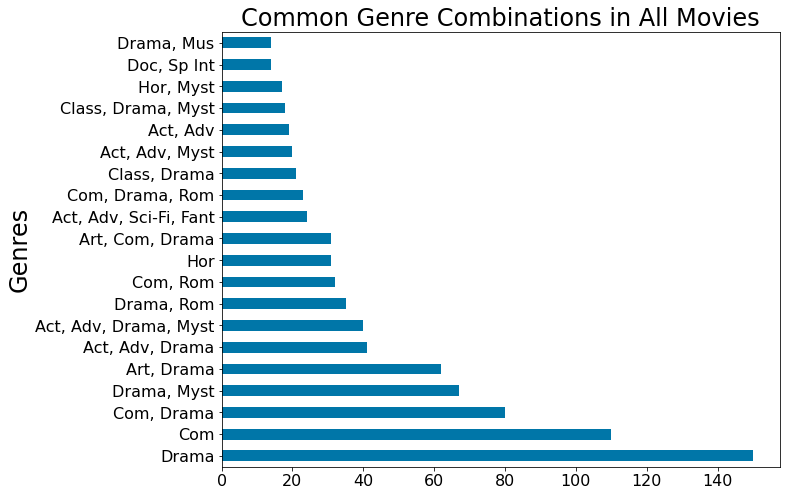

In [22]:
chart_combos = pd.Series(genre_combo_freq)
chart_combos = chart_combos.sort_values(ascending = False)[:20]
# chart_combos = chart_combos.sort_values(ascending = True)
chart_combos.plot(kind = 'barh', 
                  title = 'Common Genre Combinations in All Movies',
                  xlabel="Genres",
                  ylabel='Number of Movies',
                  fontsize=16)

Text(0, 0.5, 'Genres')

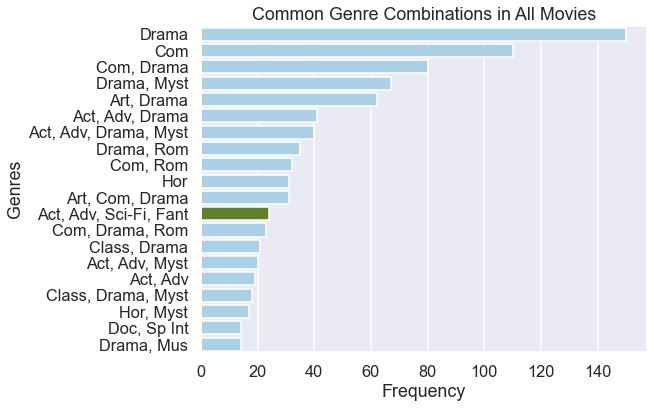

In [39]:
# using seaborn to make style consistent with other group members' charts
fig, ax = plt.subplots(figsize = (8,6))
sns.set_context('talk',font_scale=.99)
sns.set_style('darkgrid')
ax.set_title('Common Genre Combinations in All Movies')
col = ['#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#648D1C',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF']
sns.set_palette(sns.color_palette(col))
sns.barplot(y=chart_combos.index,x=chart_combos)
ax.set_xlabel('Frequency')
ax.set_ylabel('Genres')

In [37]:
top_combos = top_mi['genre']
top_combos = top_combos.map(lambda x: ', '.join([genre_legend[i]for i in x if i != '-']))
top_combo_freq = {}
for g in top_combos:
    if g not in top_combo_freq.keys():
        top_combo_freq[g] = 1
    else:
        top_combo_freq[g] += 1
top_combo_freq

{'Drama': 3,
 'Act, Adv, Sci-Fi, Fant': 4,
 'Act, Adv, Myst': 3,
 'Com': 8,
 'Fam, Sci-Fi, Fant': 1,
 'Act, Adv, Drama, Sci-Fi, Fant': 1,
 'Com, Rom': 4,
 'Act, Adv, Com, Drama': 1,
 'Act, Adv, Drama, Myst': 4,
 'Sci-Fi, Fant': 1,
 'Act, Adv, Myst, Sci-Fi, Fant': 1,
 'Drama, Hor, Myst, Rom': 1,
 'Com, Fam, Rom': 1,
 'Drama, Sci-Fi, Fant, Rom': 1,
 'Anim, Com, Fam': 1,
 'Act, Adv, Anim, Fam': 1,
 'Act, Adv, Drama, Myst, Sci-Fi, Fant': 1,
 'Com, Drama, Rom': 4,
 'Com, Drama': 1,
 'Act, Adv, Anim, Com': 1,
 'Anim, Fam': 1,
 'Act, Adv, Anim, Com, Drama, Fam': 1,
 'Drama, Myst': 2,
 'Act, Adv, Com, Sci-Fi, Fant': 1,
 'Anim, Com': 1,
 'Com, Fam': 1}

<AxesSubplot:title={'center':'Genre Combinations in Top 50 Movies'}, ylabel='Genres'>

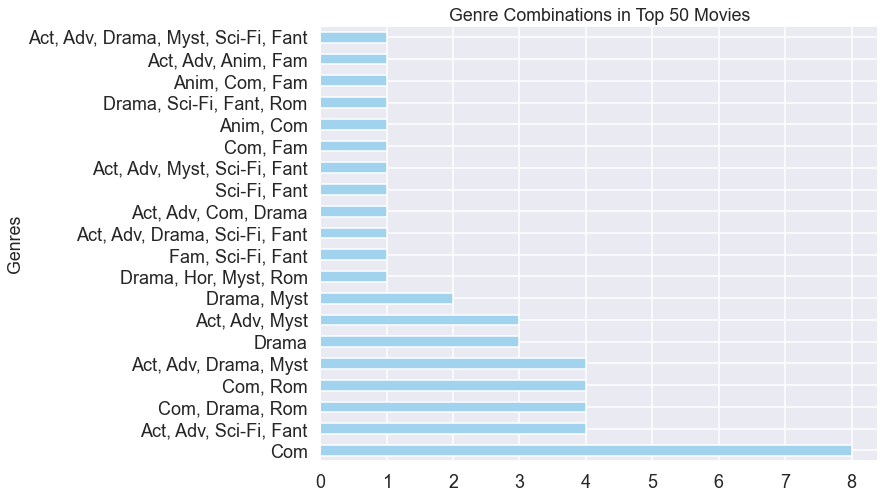

In [45]:
chart_combos_top = pd.Series(top_combo_freq)
chart_combos_top = chart_combos_top.sort_values(ascending = False)[:20]
# chart_combos_top = chart_combos_top.sort_values(ascending = True)
chart_combos_top.plot(kind = 'barh', 
                      title = 'Genre Combinations in Top 50 Movies',
                      xlabel="Genres",
                      ylabel='Number of Movies',
                      fontsize=18)

Text(0, 0.5, 'Genres')

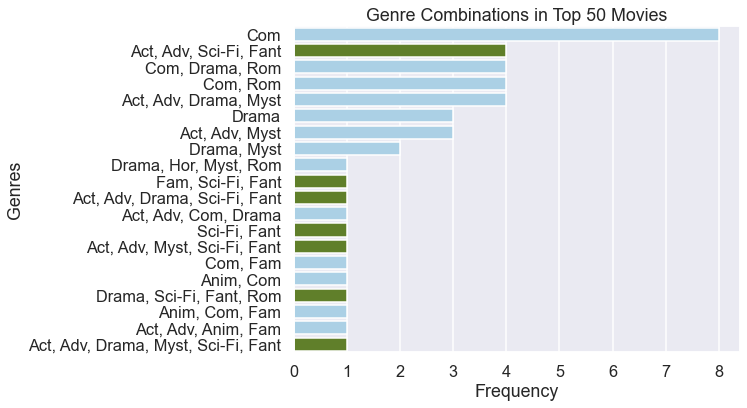

In [48]:
# using seaborn to make style consistent with other group members' charts
fig, ax = plt.subplots(figsize = (8,6))
sns.set_context('talk',font_scale=.99)
sns.set_style('darkgrid')
ax.set_title('Genre Combinations in Top 50 Movies')
col = ['#A1D3EF',
       '#648D1C',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#A1D3EF',
       '#648D1C',
       '#648D1C',
       '#A1D3EF',
       '#648D1C',
       '#648D1C',
       '#A1D3EF',
       '#A1D3EF',
       '#648D1C',
       '#A1D3EF',
       '#A1D3EF',
       '#648D1C']
sns.set_palette(sns.color_palette(col))
sns.barplot(y=chart_combos_top.index,x=chart_combos_top)
ax.set_xlabel('Frequency')
ax.set_ylabel('Genres')

Identifying common words in synopsis

In [24]:
# importing Natural Language Toolkit for tokenization
import nltk
nltk.download("stopwords")
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhedges\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dhedges\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
# making list of words in the synopses of top 50 movies
top_corpus = []
for i in range(50):
    top_corpus += word_tokenize(top_mi['synopsis'].iloc[i])
    
# excluding common stop words and punctuation
stops = stopwords.words('english')
punctuation = """!@#$%^&*()_+-={}[]:;"'<>?,./"""
words_to_cut = ["'s",'--',"'nt","'snt","''","``","n't","c","also","...","'ll","'re"]
top_corpus = [x.lower() for x in top_corpus if x.lower() not in stops and\
              x not in punctuation and x not in words_to_cut]

# making frequency distribution as a dict, then a pandas Series
corp_freq = {}
for word in top_corpus:
    if word not in corp_freq.keys():
        corp_freq[word] = 1
    else:
        corp_freq[word] += 1
frequencies = pd.Series(corp_freq)
chart_freq = frequencies.sort_values(ascending = False)[:20]
chart_freq

one         29
new         18
life        18
film        17
family      13
bourne      13
world       13
first       12
get         12
man         12
finds       11
comedy      11
job         10
soon        10
back        10
find        10
princess     9
love         9
takes        9
help         9
dtype: int64

Charting Findings

<AxesSubplot:title={'center':'Most Common Words in Top 50 Movie Descriptions'}, xlabel='Words', ylabel='Frequency'>

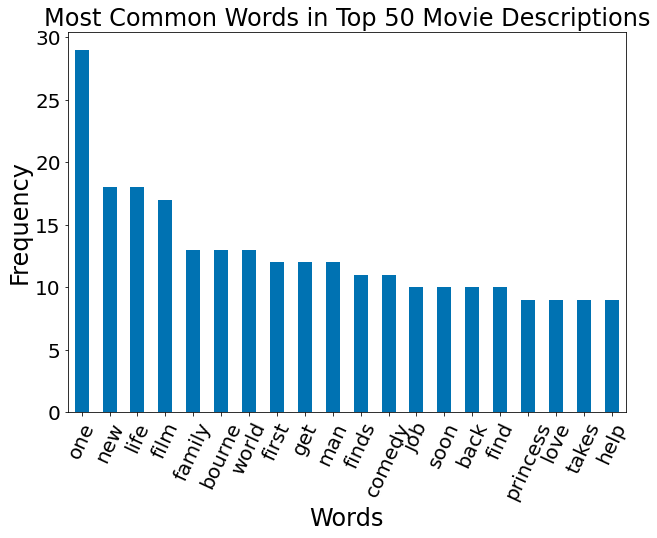

In [51]:
chart_freq.plot(kind = 'bar', 
                title = 'Most Common Words in Top 50 Movie Descriptions',
                xlabel="Words",
                ylabel='Frequency',
                fontsize=20,
                rot = 65)

### Finding Reviews of Best Movies

In [17]:
# quick look at review data
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,-,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,-,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,-,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,-,fresh,-,0,Cinema Scope,"October 12, 2017"


In [30]:
# make Series of reviews with 'fresh' rating
reviews_best = reviews[reviews['fresh']=='fresh']['review']
reviews_best.head()

0    A distinctly gallows take on contemporary fina...
2    ... life lived in a bubble in financial dealin...
3    Continuing along a line introduced in last yea...
4               ... a perverse twist on neorealism... 
5    ... Cronenberg's Cosmopolis expresses somethin...
Name: review, dtype: object

In [54]:
# making list of words in the synopses of top 50 movies
review_corpus = []
for i in range(len(reviews_best)):
    review_corpus += word_tokenize(reviews_best.iloc[i])
    
# excluding common stop words and punctuation
review_corpus = [x.lower() for x in review_corpus if x.lower() not in stops\
                 and x not in punctuation and x not in words_to_cut]

# making frequency distribution as a dict, then a pandas Series
review_freq = {}
for word in review_corpus:
    if word not in review_freq.keys():
        review_freq[word] = 1
    else:
        review_freq[word] += 1
r_frequencies = pd.Series(review_freq)
chart_review = r_frequencies.sort_values(ascending = False)[:20]
chart_review

film           5120
movie          3410
one            2412
story          1613
like           1594
good           1310
best           1269
comedy         1181
even           1115
funny          1035
time            977
great           961
fun             959
much            940
way             878
make            876
makes           873
performance     845
love            842
characters      827
dtype: int64

<AxesSubplot:title={'center':'Most Common Words in "Fresh" Movie Reviews'}, xlabel='Words', ylabel='Frequency'>

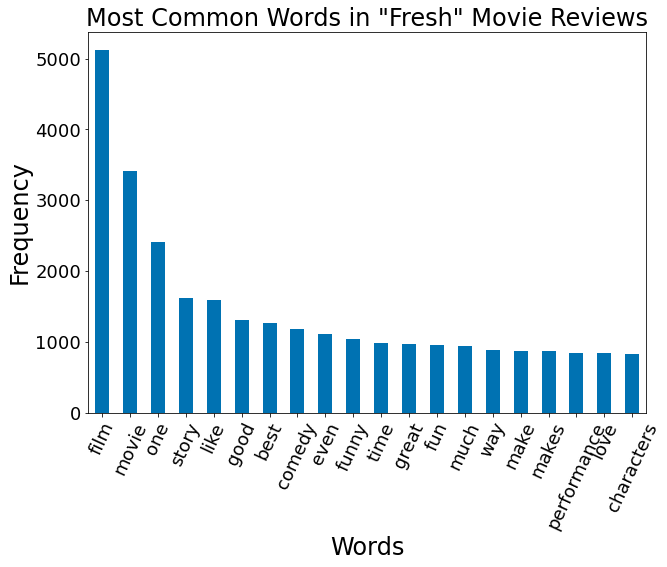

In [57]:
chart_review.plot(kind = 'bar', 
                  title = 'Most Common Words in "Fresh" Movie Reviews',
                  xlabel="Words",
                  ylabel='Frequency',
                  fontsize=18,
                  rot = 65)

### Testing for Significance in Sci-fi Fantasy Profit

In [152]:
tmdbMovies['movie'] = tmdbMovies['original_title']
tmdbMovies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,genres,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,movie
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,"['Adventure', 'Fantasy', 'Family']",...,0,0,0,0,0,0,0,0,0,Harry Potter and the Deathly Hallows: Part 1
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,"['Fantasy', 'Adventure', 'Animation', 'Family']",...,0,0,0,0,0,0,0,0,0,How to Train Your Dragon
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,"['Adventure', 'Action', 'Science Fiction']",...,0,0,0,0,1,0,0,0,0,Iron Man 2
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,"['Animation', 'Comedy', 'Family']",...,0,0,0,0,0,0,0,0,0,Toy Story
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,"['Action', 'Science Fiction', 'Adventure']",...,0,0,0,0,1,0,0,0,0,Inception


In [153]:
tmdbMovies = tmdbMovies.drop_duplicates()
tmdbMovies.duplicated().value_counts()

False    25497
dtype: int64

In [155]:
# attempting to merge movieBudgets and tmdbMovies
# to get dataframe with genre and cost and income
df_merged = pd.merge(movieBudgets,tmdbMovies,on=['movie'],how = 'inner')
df_merged.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,id_y,original_language,original_title,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,"[28, 12, 14, 878]",19995,en,Avatar,...,0,0,0,0,0,1,0,0,0,0
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,...,0,0,0,0,0,0,0,0,0,0
2,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,...,0,0,0,0,0,1,0,0,0,0
3,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,"[12, 28, 14]",299536,en,Avengers: Infinity War,...,0,0,0,0,0,0,0,0,0,0
4,9,2017-11-17,Justice League,300000000,229024295,655945209,"[28, 12, 14, 878]",141052,en,Justice League,...,0,0,0,0,0,1,0,0,0,0


In [158]:
# seeing how many values are missing in worldwide and domestic gross
df_merged['worldwide_gross'].value_counts()

0            194
385997896      6
44793168       6
95127344       5
34356760       4
            ... 
9111           1
50206          1
82182803       1
644602516      1
1521672        1
Name: worldwide_gross, Length: 1789, dtype: int64

In [159]:
# since there are more missing values in domestic, I will use worldwide gross
df_merged['domestic_gross'].value_counts()

0            270
15433          6
177397510      6
41411015       5
43787265       4
            ... 
53862963       1
28848693       1
75986503       1
42469946       1
35088320       1
Name: domestic_gross, Length: 1718, dtype: int64

In [164]:
rows_to_drop = df_merged[df_merged['worldwide_gross']==0].index
df_merged=df_merged.drop(rows_to_drop)
df_merged['worldwide_gross'].value_counts()

44793168     6
385997896    6
95127344     5
58978477     4
278964806    4
            ..
103735965    1
171685793    1
18309793     1
17492014     1
76347393     1
Name: worldwide_gross, Length: 1788, dtype: int64

In [165]:
# making column for worldwide profit
df_merged['profit']=df_merged['worldwide_gross']-df_merged['production_budget']
df_merged.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,genre_ids,id_y,original_language,original_title,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,"[28, 12, 14, 878]",19995,en,Avatar,...,0,0,0,0,1,0,0,0,0,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,...,0,0,0,0,0,0,0,0,0,635063875
2,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,...,0,0,0,0,1,0,0,0,0,1072413963
3,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,"[12, 28, 14]",299536,en,Avengers: Infinity War,...,0,0,0,0,0,0,0,0,0,1748134200
4,9,2017-11-17,Justice League,300000000,229024295,655945209,"[28, 12, 14, 878]",141052,en,Justice League,...,0,0,0,0,1,0,0,0,0,355945209


In [173]:
# making Series of the profits of sci-fi fantasy movies
sff_profits = df_merged[(df_merged['Science Fiction']==1)\
                        |(df_merged['Fantasy']==1)]['profit']
# making Series of the profits of all movies
all_profits = df_merged['profit']

Null Hypothesis:
    There is no difference in profits in Sci-Fi and Fantasy movies from the population

Alternative Hypothesis:
    Profits of Sci-fi and Fantasy movies are higher than the population
    
alpha = 0.01

99% confidence

In [181]:
# calculating z statistic
mu = all_profits.mean()
x_bar = sff_profits.mean()
sigma = np.std(all_profits)
n = len(sff_profits)

z= (x_bar - mu)/(sigma/math.sqrt(n))
z

11.179110841080053

In [182]:
# calculating p-value
stats.norm.cdf(z)
pval = 1- stats.norm.cdf(z)
pval

0.0

In [194]:
print(f'Average Profit of All Films: {mu}')
print(f'Average Profit of Sci-fi and Fantasy Films: {x_bar}')

Average Profit of All Films: 89250708.59128205
Average Profit of Sci-fi and Fantasy Films: 196490685.9390863
